# SF Salaries Exercise



# **Load Necessary libraries**

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ** Read Salaries.csv as a dataframe called sal.**

In [196]:
k = pd.read_csv('Salaries.csv')
k.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# ** Check the head of the DataFrame. **

In [197]:
k.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [198]:
# Check nan values
k.isna().sum()


,0
Id,0
EmployeeName,0
JobTitle,0
BasePay,609
OvertimePay,4
OtherPay,4
Benefits,36163
TotalPay,0
TotalPayBenefits,0
Year,0


In [199]:
#total records , rows and columns
k.size
k.shape


(148654, 13)

In [200]:
#check feature names
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [201]:
#drop Notes and Status columns

k = k.drop(columns=['Notes','Status'])

In [202]:
#check new shape
k.shape

(148654, 11)

In [203]:
#check columns
k.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [204]:
#fill BasePay NaN by using some technique
h = k['BasePay'].fillna(0)
h.isna().sum()





np.int64(0)

# **What is the average BasePay ?**

In [205]:
h.mean()


np.float64(66053.72928807836)

# ** What is the highest amount of OvertimePay in the dataset ? **

In [206]:
k['OvertimePay'].max()

245131.88

## Fetch record of Highest paid employee

In [207]:
max_value_row = k[k['TotalPayBenefits'] == k['TotalPayBenefits'].max()]
max_value_row.iloc[0]

,0
Id,1
EmployeeName,NATHANIEL FORD
JobTitle,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
BasePay,167411.18
OvertimePay,0.0
OtherPay,400184.25
Benefits,NaN
TotalPay,567595.43
TotalPayBenefits,567595.43
Year,2011


## Fetch name of highest Overtime pay employee


In [208]:
max_value_row = k[k['OvertimePay'] == k['OvertimePay'].max()]
max_value_row.iloc[0]['EmployeeName']

'GARY JIMENEZ'

# ** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [209]:
max_value_row = k[k['EmployeeName'] == 'JOSEPH DRISCOLL']
max_value_row.iloc[0]['JobTitle']

'CAPTAIN, FIRE SUPPRESSION'

# ** How much does JOSEPH DRISCOLL make (including benefits)? **

In [210]:
max_value_row = k[k['EmployeeName'] == 'JOSEPH DRISCOLL']
max_value_row.iloc[0]['TotalPayBenefits']

np.float64(270324.91)

# ** What is the name, Job title of highest paid person (including benefits)?**

In [211]:
max_value_row = k[k['TotalPayBenefits'] == k['TotalPayBenefits'].max()]
h = dict(max_value_row.iloc[0])
print(f"EmployeeName: {h['EmployeeName']}")
print(f"Job Title: {h['JobTitle']}")

EmployeeName: NATHANIEL FORD
Job Title: GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY


# ** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [212]:
min_value_ = k[k['TotalPayBenefits'] == k['TotalPayBenefits'].min()]
min_value_.iloc[0]['EmployeeName']

'Joe Lopez'

## Show me the records with totalpaybenefit less than or equal to 0


In [213]:
total_records = k[k['TotalPayBenefits'] <=0]
total_records

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.00,NaN,0.00,0.00,2011,San Francisco
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.00,NaN,0.00,0.00,2011,San Francisco
36158,36159,JOSEPHINE MCCREARY,MANAGER IV,0.0,0.0,0.00,NaN,0.00,0.00,2011,San Francisco
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.00,-2.73,0.00,-2.73,2013,San Francisco
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.00,-8.20,0.00,-8.20,2013,San Francisco
110530,110531,David P Kucia,Police Officer 3,NaN,0.0,0.00,-33.89,0.00,-33.89,2013,San Francisco
148626,148627,Paulet Gaines,Account Clerk,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148627,148628,Brett A Lundberg,General Laborer,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148628,148629,Mark W Mcclure,General Laborer,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148629,148630,Elizabeth Iniguez,Transcriber Typist,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco


# ** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [214]:
# Yearwise Average BasePay
k = k[k['Year'].isin([2011, 2012, 2013, 2014])]
k['BasePay'] = pd.to_numeric(k['BasePay'])
average_basepay_per_year = k.groupby('Year')['BasePay'].mean()
print(average_basepay_per_year)

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64


# ** How many unique job titles are there? **

In [215]:
k['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

# ** What are the top 5 most common jobs? **

In [216]:
top_5 = k['JobTitle'].value_counts().head(5)
print(top_5)

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64


In [ ]:
# last five


# How many are there those work as a POLICE OFFICER III

In [217]:
print(int((k['JobTitle'] == 'POLICE OFFICER III').sum()))


779


# In which department we have least employees?

In [218]:
least_employess = k['JobTitle'].value_counts().tail(1)
print(least_employess)

JobTitle
Special Assistant 8    1
Name: count, dtype: int64


# Fetch record of year 2011 where Basepay 200000

In [223]:
record_basepay = k[(k['Year'] == 2011) & (k['BasePay'] == 200000)]
print(record_basepay)

Empty DataFrame
Columns: [Id, EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits, Year, Agency]
Index: []


# How much average basepay is given to employees inthe year 2013

In [220]:
year_2013_data = k[k['Year'] == 2013]
average_pay = float(year_2013_data['BasePay'].mean())
average_pay


69630.03021648065

In [221]:
k

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco


# Plot.the % distribustion of Yearwise TotalPay

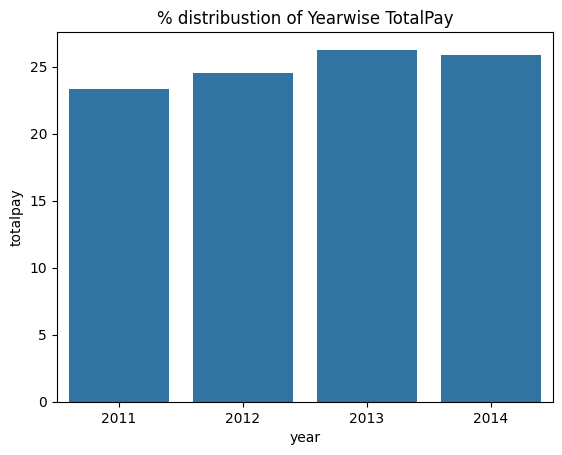

In [235]:
total_sum = k.groupby('Year')['TotalPay'].sum()
percentages = (total_sum/total_sum.sum())*100
sns.barplot(x=percentages.index, y=percentages.values)
plt.xlabel('year')
plt.ylabel('totalpay')
plt.title('% distribustion of Yearwise TotalPay')
plt.show()

# How many employees getting 0 overtimePay?

In [238]:
overtime_zero = k[k['OvertimePay'] == 0].value_counts().sum()
overtime_zero

np.int64(57741)

## Load data from Github

In [241]:
import requests
from io import StringIO
github_url = "https://raw.githubusercontent.com/sravanth123-sudo/DataScience/refs/heads/main/911.csv"  # Example URL
data = pd.read_csv(github_url)
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
